In [1]:
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0)

from ecc import *


In [3]:
# Curve Parameters
a = 7
b = 3
field_size = 37

ecc = EllipticCurve(a, b, field_size)

<module 'matplotlib.pyplot' from 'c:\\python34\\lib\\site-packages\\matplotlib\\pyplot.py'>

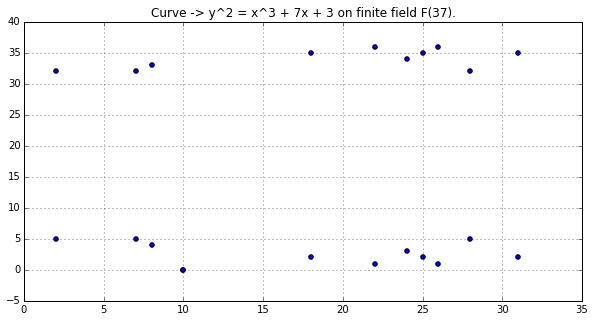

In [4]:
ecc.plot_curve()

In [5]:
# Define a Generator
Generator = Point(ecc, 2, 5, "Generator")

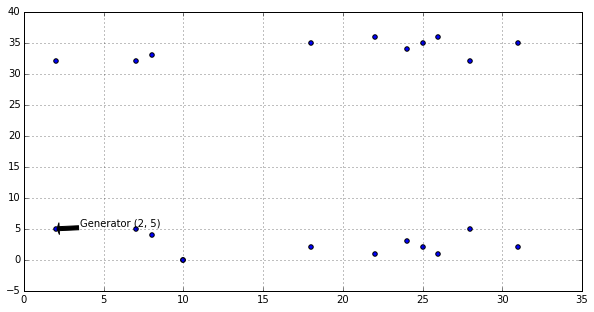

In [6]:
# Plotting points on the curve
ecc.plot_points([Generator])

Point 2 * Generator = (17, 22)


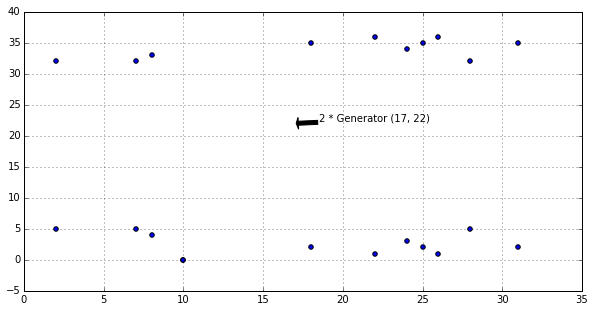

In [7]:
# Multiply points by a scalar and plot. You can give names to the point too. 
# Addition of points in the field has also been implemented

G2 = Generator * 2
G2.name = "2 * Generator"
print(G2)
ecc.plot_points([G2])

In [8]:
# Explaining the Diffie Hellman Key exchange
# Assume key exchange between Alice and Bob.

alice_private_key = 4
bob_private_key = 7

In [9]:
# The public key for Bob and Alice are defined by multiplying the Generator with their Private Keys

# Alice 
alice_pub = alice_private_key * Generator
alice_pub.name = "Alice Public Key"

print(alice_pub)

Point Alice Public Key = (7, 32)


In [10]:
# Bob
bob_pub = bob_private_key * Generator
bob_pub.name = "Bob Public Key"

print(bob_pub)

Point Bob Public Key = (18, 35)


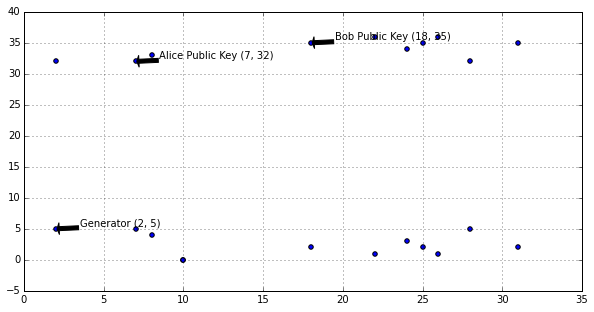

In [11]:
# Let us see where these points are on our curve - 

ecc.plot_points([Generator, alice_pub, bob_pub])

In [12]:
# The above points and the curves are available publicly. 
# Thus, the shared secret is calculated by multiplying the public keys of the reciever with youur own private key.

shared_secret_bob = alice_pub * bob_private_key
shared_secret_alice = bob_pub * alice_private_key

In [13]:
# Let's check if these secrets generated independently are the same. 

print(shared_secret_alice)
print(shared_secret_bob)

# You can simply compare the two objects too! :D 
assert(shared_secret_alice == shared_secret_bob)

Point  = (22, 1)
Point  = (22, 1)


In [14]:
# Let's give it a name
shared_secret_alice.name = "Shared Secret"

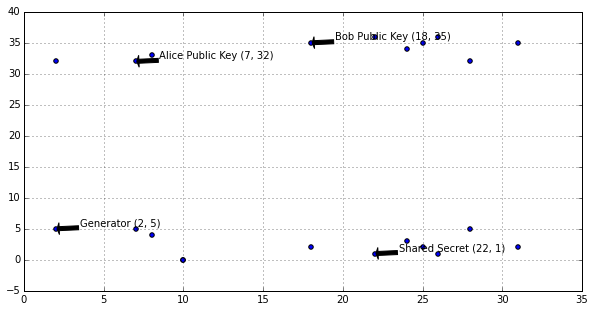

In [15]:
# Let us see the public keys and the shared secret! 

ecc.plot_points([Generator, alice_pub, bob_pub, shared_secret_alice])